In [47]:
import os, glob
import pygmt
import pickle
import numpy as np


In [78]:
def PygmtBegin(figmap, region):
#     grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
    pygmt.makecpt(cmap="elevation", series=[0, 4000, 500],output = 'eleva.cpt', continuous=True)
    figmap.basemap(region=region, projection="M15c", frame = ['x1f0.5', 'y1f0.5', 'nSeW'])
    figmap.basemap(frame =[ '+t"Pierce Point @200km, p=0.03s/km"'])
    figmap.coast(resolution = 'h', shorelines ='1/thinnest,black', water='white', borders = '1/0.25p')

In [3]:
pklpath = '/Volumes/home/Research/STEP/01_Split'

AM.ALAV
AM.ARZA
AM.BAUR
AM.BYUR
AM.GERK
AM.KECH
AM.LICH
AM.MAGY
AM.NAVR
AM.SHEN
AM.TSAP
AM.VAND
AM.ZARN
GO.AKH
GO.BGD
GO.CHVG
GO.DGRG
GO.GUDG
GO.ONI
GO.SEAG
GO.TBLG
GO.TRLG
II.KIV
IU.GNI
TG.ABST
TG.AMBR
TG.AZMN
TG.BATM
TG.BKRG
TG.BRNG
TG.BURN
TG.DDFL
TG.DMNI
TG.GANZ
TG.GUDA
TG.KHVA
TG.KZRT
TG.LGD
TG.TKBL
TG.TRLT
TG.URAV
AB.GANJ
AB.QZX
AB.ZKT
KO.TASB
KO.BCA


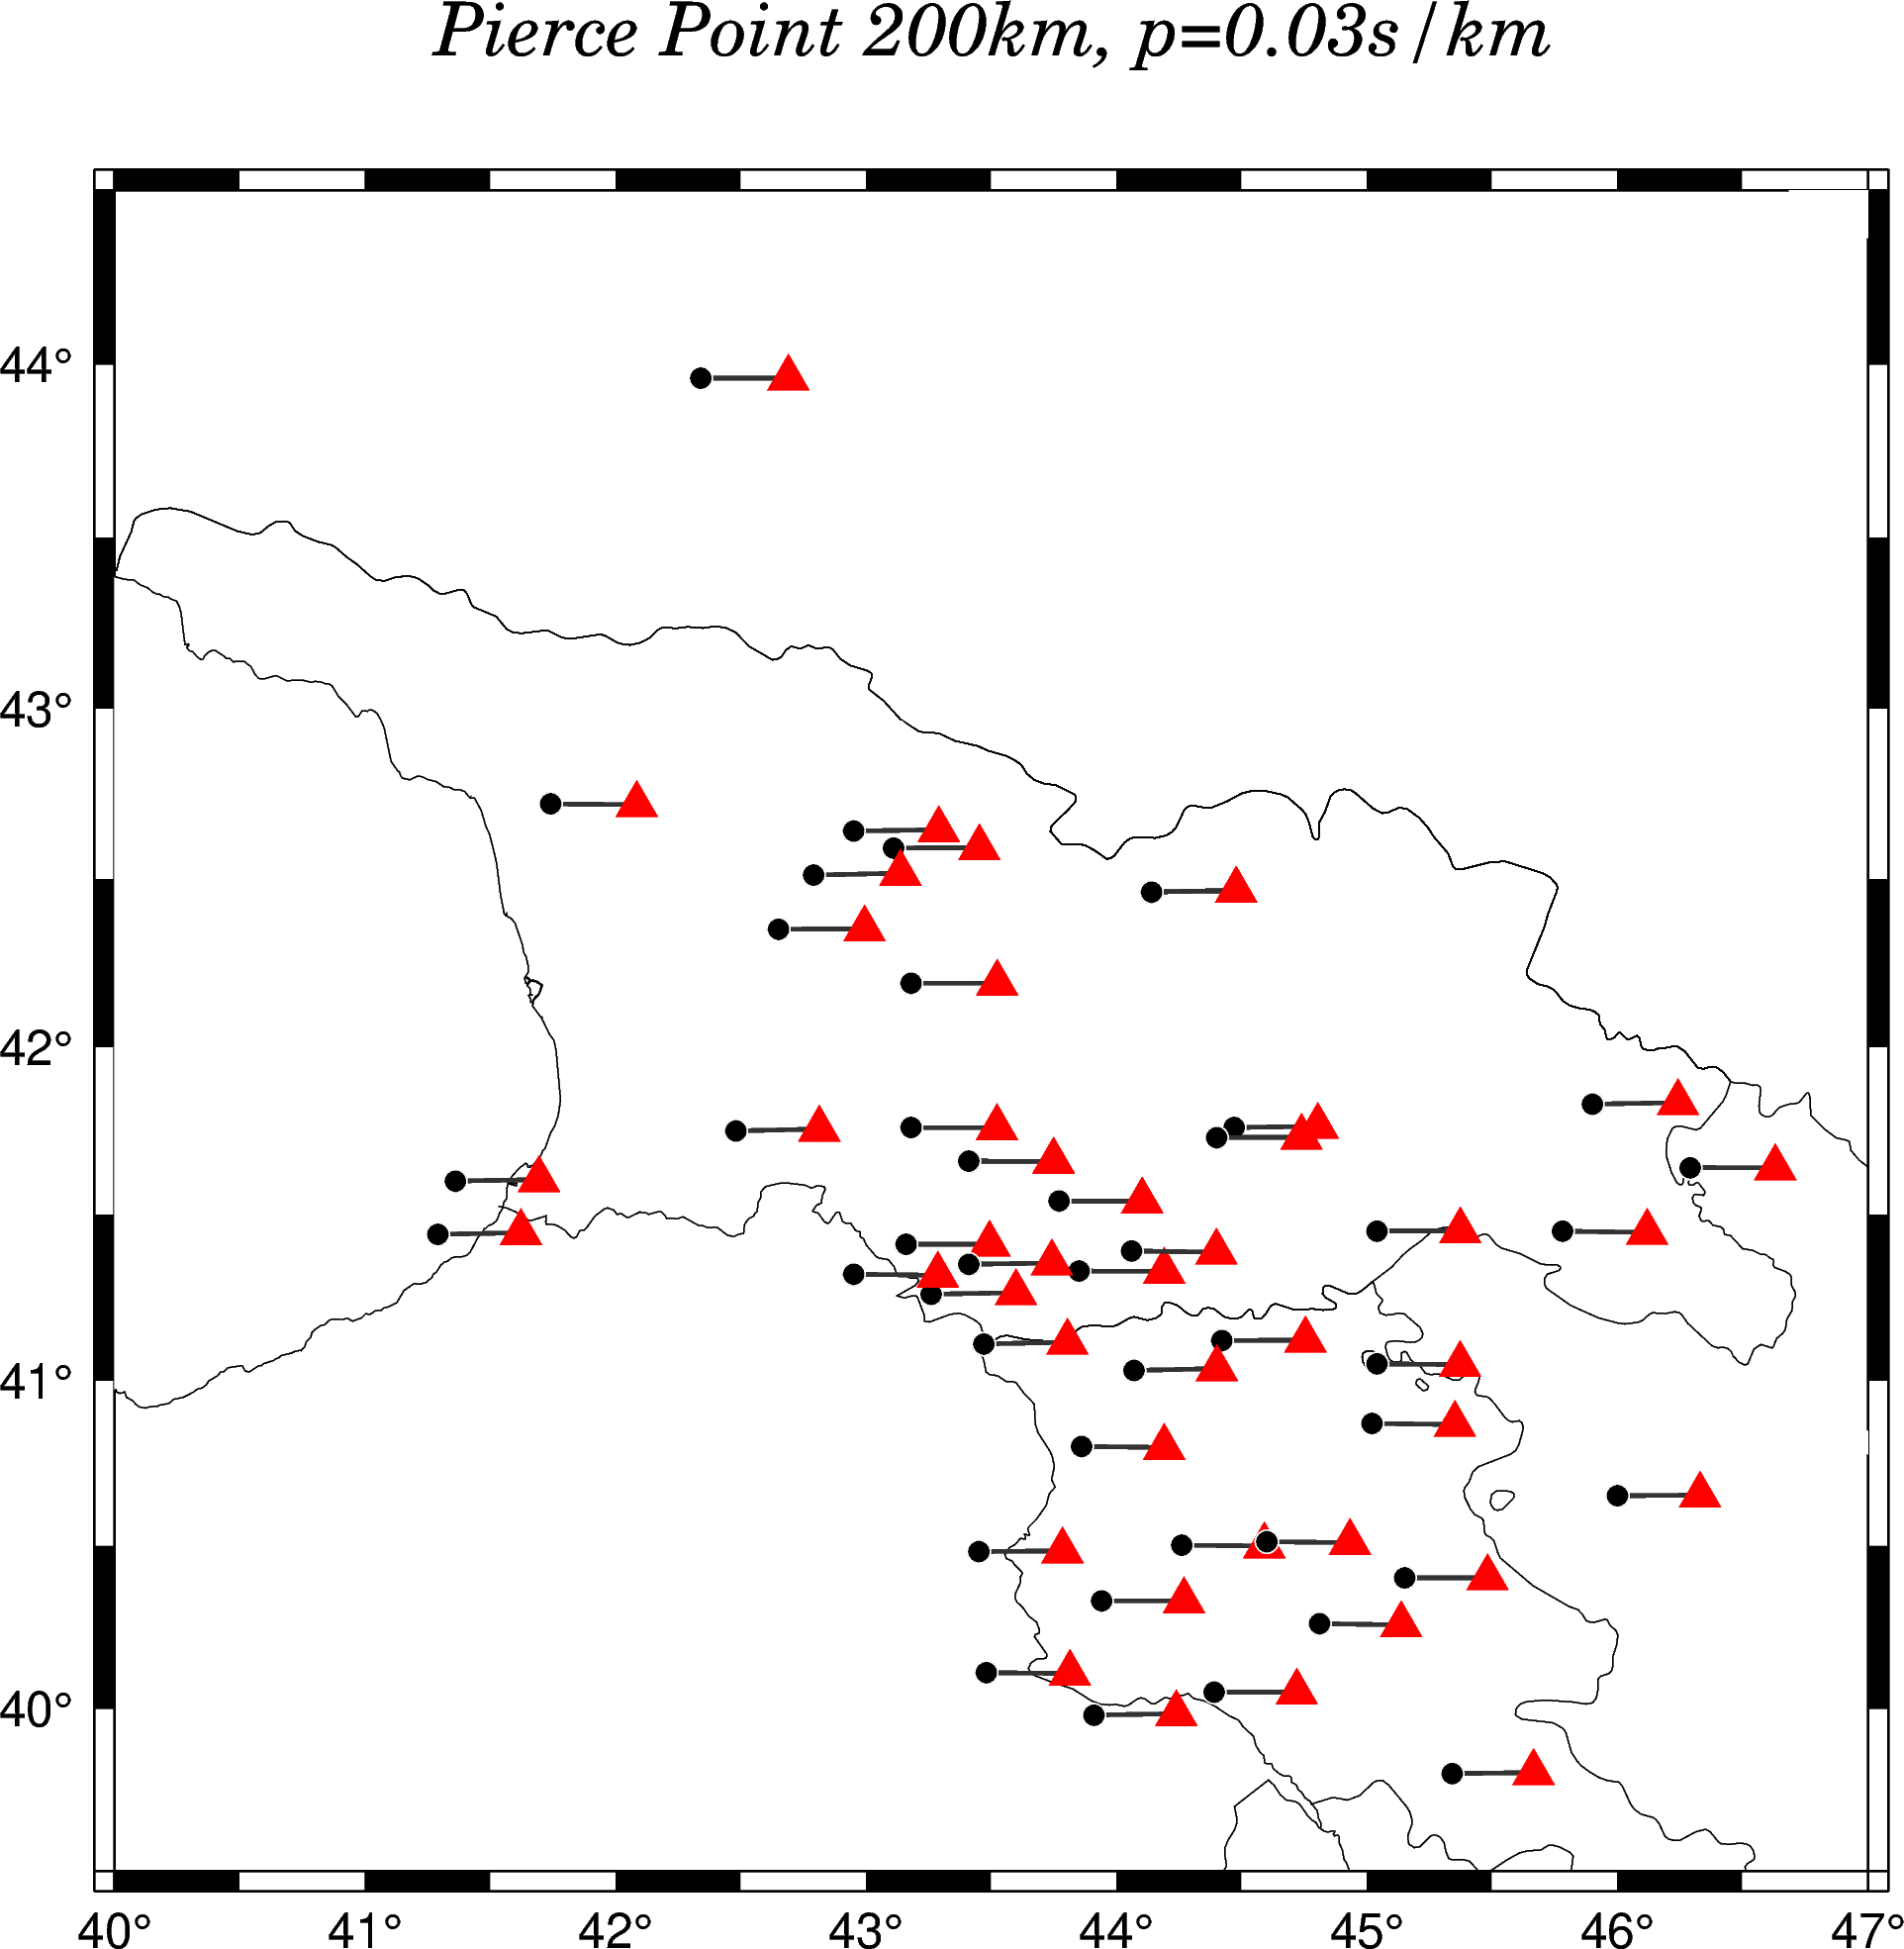

In [79]:
regvals = [40, 47, 39.5, 44.5]
figmap = pygmt.Figure()
PygmtBegin(figmap, regvals)
for stapkl in glob.glob(f'{pklpath}/*.pkl'):
    STApkl = pickle.load(open(stapkl, "rb"))
    values = [value for keys, value in STApkl.items() ][0]
    NET = values['network']; STA = values['station']
    print(f'{NET}.{STA}')  
    stlat = values['latitude']; stlon = values['longitude']
#     print(f'{stlat}  {stlon}') 
    cmd = """
    taup pierce -mod iasp91 -h 100 -deg 120 -sta %(stlat)f %(stlon)f -baz 270 -ph SKS --pierce 200 -nodiscon  > temp.txt
    """ % locals()
    os.system(cmd)
    cmd = """
    cat temp.txt | awk 'NR==3 {print$4, $5}'
    """ % locals()

    p = os.popen(cmd)
    text = str(p.read())
    p.close()
    p_lat=text.rsplit(' ')[0]
    p_lon=text.rsplit(' ')[1][:-1]
#     p_lat.append(text.rsplit(' ')[0])
#     p_lon.append(text.rsplit(' ')[1][:-1])  
#     print(text.rsplit(' ')[0],text.rsplit(' ')[1][:-1])
    os.system('rm -f temp.txt')
    figmap.plot(x=[stlon,p_lon],y=[stlat,p_lat], pen="1.0p,50")
    figmap.plot(x=p_lon, y=p_lat, style="c0.2c",color='black', pen="white")
    figmap.plot(x=stlon, y=stlat, style="t0.4c",color='red', pen="red")

    
figmap.show()